# Analise de Mudanças Climaticas Utilizando Azure Notebook 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

#### Importando dados da NASA

In [4]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

#### Criando Gráfico de Disperção

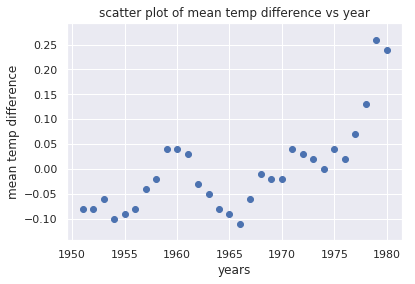

In [5]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

#### O conjunto de dados carregado usa uma média de 30 anos entre 1951 e 1980 para calcular uma temperatura base para esse período e, em seguida, usa temperaturas médias de 5 anos para calcular a diferença entre a média de 5 anos e a média de 30 anos para cada ano. O gráfico de dispersão mostra as diferenças anuais de temperatura.

## Executar Regressão Linear com Numpy

Gráficos de dispersão oferecem um meio útil para visualizar dados, mas suponha que você queira sobrepor o gráfico de dispersão com uma linha de tendência mostrando como os dados estão tendendo ao longo do tempo. Uma maneira de calcular essas linhas de tendência é a regressão linear.

#### Realizar Regressão Linear 

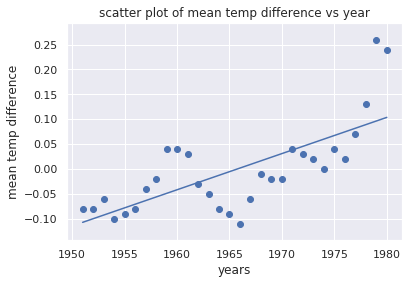

 y = 0.007279199110122221 * x + -14.309265850945222


In [6]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

#### A partir da linha de regressão, você pode ver que a diferença entre as temperaturas médias de 30 anos e as temperaturas médias de 5 anos está aumentando ao longo do tempo. A maior parte do trabalho computacional necessário para gerar a linha de regressão foi feita pela polyfitfunção NumPy , que calculou os valores de me bna equação y = mx + b.

## Realizar Regressão Linear com Scikitlearn 

Outra biblioteca popular do Python que é amplamente usada na comunidade de pesquisa é o scikit-learn, que se destaca na construção de modelos de aprendizado de máquina para ajudar a extrair informações de dados. 

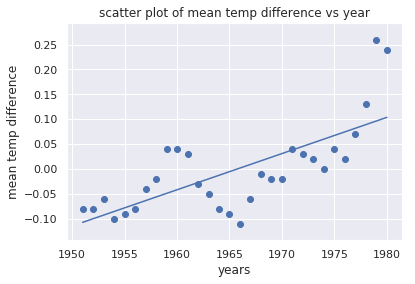

 y = 0.007279199110122357 * x + -14.309265850945492


In [8]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

#### A saída é quase idêntica à saída no exercício anterior. A diferença é que o scikit-learn fez mais do trabalho para você. Especificamente, você não precisou codificar uma função de linha como fez com o NumPy; A LinearRegressionfunção do scikit-learn fez isso por você. O scikit-learn suporta muitos tipos diferentes de regressão, o que é útil ao criar modelos sofisticados de aprendizado de máquina.

## Analise de Dados com o Seaborn

Seaborn pode criar uma linha de regressão acompanhada de uma projeção mostrando onde os pontos de dados deve cair com base na regressão com uma chamada de função simples.

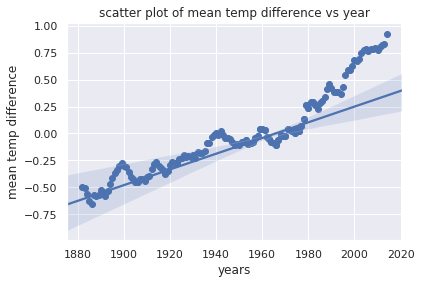

In [10]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

#### Observe como os dados apontam para os primeiros 100 anos de acordo com os valores previstos, mas os dados apontados a partir de 1980 não o fazem. São modelos como esses que levam os cientistas a acreditar que a mudança climática está se acelerando.